<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

print(tf.__version__)

2.4.1


# Loading Dataset

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
creditcard = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
creditcard.shape

(284807, 31)

In [ ]:
creditcard.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Since there is no none values we are ready to proceed

In [ ]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Balanced Data

In [ ]:
non_fraud = creditcard[creditcard['Class']==0]
fraud = creditcard[creditcard['Class']==1]

In [ ]:
non_fraud.shape, fraud.shape 

((284315, 31), (492, 31))

In [ ]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [ ]:
creditcard = fraud.append(non_fraud, ignore_index=True)
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,68863.0,1.337213,-0.470240,-0.098994,-0.689787,-0.610266,-0.902042,-0.158655,-0.186481,-1.011213,0.614610,-0.076691,-0.895915,-0.762936,0.311341,0.798670,0.598662,0.724808,-2.245999,0.432178,0.036160,-0.109026,-0.513884,0.086152,0.046890,0.338763,-0.421968,-0.017295,0.010518,42.01,0
980,54276.0,-0.105433,-0.426803,1.159064,-2.832184,-0.226770,-0.036423,0.139560,-0.184711,-2.432449,1.142453,-0.036270,-1.168377,-0.011675,-0.371654,-0.706766,0.200838,-0.482875,0.784495,0.020019,-0.227920,-0.315891,-0.520845,-0.154955,-0.910880,-0.192250,-0.504857,-0.058699,-0.113167,34.94,0
981,158231.0,-0.797577,1.069423,-0.691324,-0.425867,0.366414,-0.428505,0.869214,0.440865,-0.272659,-1.373496,0.233115,0.118027,-0.722681,-1.218635,-1.512127,0.562635,0.916207,1.123844,0.193941,0.115730,0.135160,0.403563,-0.085938,-0.588485,-0.107814,0.592324,0.214164,0.191973,99.00,0
982,169815.0,2.082280,0.508316,-2.615466,1.318233,1.330873,-0.570512,0.644487,-0.280705,0.194771,-0.355290,-1.192293,-0.293991,-0.312334,-1.008191,-0.257869,-0.018734,0.758661,0.276818,-0.167986,-0.216680,-0.087369,-0.042892,-0.073356,-0.102808,0.569283,-0.478532,-0.002685,-0.029833,5.88,0


In [ ]:
creditcard['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

SO we have 492 fraud dataset, data is imbalanced

In [ ]:
x = creditcard.drop('Class', axis=1)
y = creditcard['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state = 0, stratify = y)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,42156.0,-0.202546,-0.880241,1.313761,-1.890034,0.972917,4.735698,-1.131050,1.096684,0.266995,-0.021690,-1.152102,-0.598124,-0.188403,-1.695451,-1.837221,0.507171,0.469954,-0.877766,1.671463,0.394670,0.096070,0.593071,-0.205095,1.067097,0.197070,-0.101697,-0.036639,-0.158892,58.00
898,87296.0,-0.658540,1.576872,-0.114859,0.795463,1.803102,0.023253,1.372267,-0.063105,-1.289087,-0.753884,0.771490,-0.014044,-0.443632,-0.868292,-0.582953,-0.409372,1.035673,0.951200,1.151934,0.061873,0.008539,0.079707,-0.631570,0.182604,1.143040,-0.223580,-0.080647,0.077976,3.24
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,-13.670545,10.545263,-15.022700,0.171633,-15.066374,-0.259576,-8.668739,-12.804141,-5.116620,0.579200,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,145680.0,-1.570818,0.273738,1.986327,-3.591481,-0.765840,1.311050,-1.844790,-3.038908,-0.020819,-0.829514,-0.132629,0.036566,-0.829516,-0.283362,-0.422123,-0.160748,-1.018655,2.429256,-1.751329,0.088155,-0.749522,0.112403,-0.079986,0.175299,0.275886,0.585267,0.098004,-0.077142,10.00
739,7689.0,-0.515859,1.199603,1.568964,-0.233186,0.593782,-0.540135,0.784834,-0.135750,0.622424,-1.383385,1.015197,-1.915965,2.763625,0.835993,-0.176116,0.250686,0.691265,-0.502009,-1.299585,-0.116354,-0.291385,-0.580845,0.000781,-0.009816,-0.454402,-0.108661,0.072285,0.135729,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,-3.252634,5.040751,-5.314442,-0.656471,-6.233044,0.974771,-6.890318,-9.516411,-4.364128,2.598578,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,75558.0,-1.373316,0.935575,1.948506,0.809954,-1.442374,-0.023349,-0.888863,1.107659,-0.064684,-0.944197,-0.419472,0.519898,-0.220238,0.229046,0.615759,-0.374587,0.934279,-0.516808,0.223385,-0.207280,0.114455,0.160286,-0.028903,0.638704,0.029438,0.440767,-0.356261,-0.160586,13.86
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,-4.138891,5.149409,-11.124019,0.543068,-7.840942,0.743634,-6.777069,-9.931765,-4.093021,1.504925,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,125030.0,1.737900,-0.367856,-2.421560,0.010330,1.234209,0.316419,0.661483,-0.028873,0.011897,-0.065324,1.423600,1.191218,-0.144285,1.147570,0.572422,-1.413526,0.221009,-1.199110,-0.716173,-0.116097,0.360456,1.029830,-0.143870,-1.380418,0.334150,-0.327202,-0.007622,-0.074626,118.58


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Build CNN

In [ ]:
epochs = 20
model = Sequential()
model.add(Conv1D(10,2, activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(8,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # Binary Classification


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 29, 10)            30        
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 10)            40        
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 10)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 28, 8)             168       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 8)             32        
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 8)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 224)              

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 10ms/step - loss: 0.2212 - acc: 0.8831 - val_loss: 0.2003 - val_acc: 0.9086
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2187 - acc: 0.8856 - val_loss: 0.2004 - val_acc: 0.9137
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2377 - acc: 0.8869 - val_loss: 0.2048 - val_acc: 0.9137
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2434 - acc: 0.8793 - val_loss: 0.2063 - val_acc: 0.9137
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2189 - acc: 0.8895 - val_loss: 0.2048 - val_acc: 0.9137
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2010 - acc: 0.8895 - val_loss: 0.2028 - val_acc: 0.9137
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2257 - acc: 0.8856 - val_loss: 0.2046 - val_acc: 0.9086
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2151 - acc: 0.8

In [ ]:
def plot_learning(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

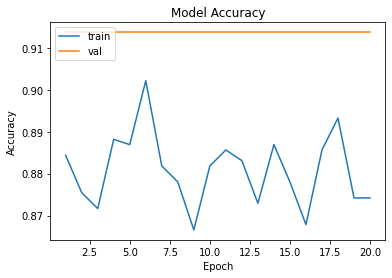

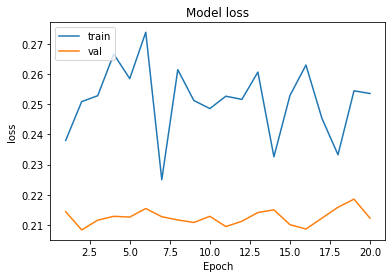

In [ ]:
plot_learning(history,epochs)